In [34]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../src')
import dce_fit, relaxivity, signal_models, water_ex_models, aifs, pk_models
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


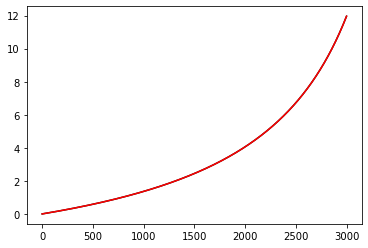

In [41]:
r1, r2 = 5.0, 0
tr, fa, te  = 3.4e-3, 15, 1.7e-3
t10 = 2
k_fa = 1.4

enh = np.arange(3000)

c_to_r_model = relaxivity.CRLinear(r1, r2)
signal_model = signal_models.SPGR(tr, fa, te)
e_to_c_num = dce_fit.EnhToConc(c_to_r_model, signal_model)
C_t_num = e_to_c_num.proc(enh, t10, k_fa)

e_to_c_ana = dce_fit.EnhToConcSPGR(tr, fa, r1)
C_t_ana = e_to_c_ana.proc(enh, t10, k_fa)

plt.plot(enh, C_t_num, 'k-',
         enh, C_t_ana, 'r-')